In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\anass\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [25]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset_cotton/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Users\\anass\\Plant_Diseases_Detection\\Training\\AugmentedImagesCoton"
)

Found 1608 images belonging to 4 classes.


In [4]:
train_generator.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.39798707 0.60127246 0.2760367 ]
  [0.4036354  0.6188924  0.2896237 ]
  [0.3775832  0.6120826  0.2751456 ]
  ...
  [0.20784315 0.46274513 0.09411766]
  [0.20784315 0.46274513 0.09411766]
  [0.20784315 0.46274513 0.09411766]]

 [[0.40327066 0.6047948  0.28026357]
  [0.40293095 0.61713123 0.28821474]
  [0.3800489  0.61278707 0.27655455]
  ...
  [0.18939917 0.44737512 0.06645168]
  [0.18728574 0.44561392 0.06328152]
  [0.1851723  0.44385275 0.06011137]]

 [[0.40855426 0.6083172  0.28449047]
  [0.40222645 0.61537    0.2868058 ]
  [0.38251457 0.61349154 0.27796352]
  ...
  [0.18431373 0.4431373  0.05882353]
  [0.18431373 0.4431373  0.05882353]
  [0.18431373 0.4431373  0.05882353]]

 ...

 [[0.35543227 0.3239008  0.24218361]
  [0.3522621  0.32037836 0.24007016]
  [0.34909198 0.316856   0.23795673]
  ...
  [0.5577985  0.81309605 0.3617201 ]
  [0.53841877 0.80392164 0.3499685 ]
  [0.56018966 0.80641675 0.40106878]]

 [[0.32328576 0.28813472 0.22118187]
  [0.32751262 0.29271385 0.22505651]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset_cotton/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 228 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset_cotton/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 464 images belonging to 4 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6545904  0.5686275  0.35897934]
  [0.70750636 0.627247   0.42359093]
  [0.74029845 0.67014927 0.4742903 ]
  ...
  [0.7613696  0.70254606 0.43980092]
  [0.7550067  0.69618315 0.433438  ]
  [0.74864376 0.68982023 0.4270751 ]]

 [[0.6554388  0.5686275  0.35855514]
  [0.6960531  0.6153695  0.4108651 ]
  [0.743692   0.67184603 0.4751387 ]
  ...
  [0.70164603 0.6428225  0.3800774 ]
  [0.6948589  0.6360354  0.3732903 ]
  [0.6880718  0.62924826 0.36650318]]

 [[0.6562872  0.5686275  0.35813096]
  [0.6845999  0.6034921  0.39813927]
  [0.7470856  0.6735428  0.4759871 ]
  ...
  [0.65882355 0.6        0.3372549 ]
  [0.65882355 0.6        0.3372549 ]
  [0.65882355 0.6        0.3372549 ]]

 ...

 [[0.64869034 0.91350603 0.5095845 ]
  [0.64996296 0.9143544  0.5104328 ]
  [0.6512355  0.9152028  0.5112812 ]
  ...
  [0.45077866 0.5292101  0.28999436]
  [0.4693431  0.5424217  0.30052957]
  [0.5528435  0.61547154 0.3643741 ]]

 [[0.6603861  0.9139911  0.5137255 ]
  [0.66165864 0.91314274 0.5137255 ]


In [46]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [47]:
##Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [49]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 137s 3s/step - loss: 0.2844 - accuracy: 0.8818 - val_loss: 0.4188 - val_accuracy: 0.8438
Epoch 2/20
47/47 [==============================] - 156s 3s/step - loss: 0.2351 - accuracy: 0.9027 - val_loss: 0.2996 - val_accuracy: 0.9010
Epoch 3/20
47/47 [==============================] - 159s 3s/step - loss: 0.2294 - accuracy: 0.9095 - val_loss: 0.2748 - val_accuracy: 0.9167
Epoch 4/20
47/47 [==============================] - 134s 3s/step - loss: 0.2149 - accuracy: 0.9236 - val_loss: 0.2334 - val_accuracy: 0.9062
Epoch 5/20
47/47 [==============================] - 144s 3s/step - loss: 0.2416 - accuracy: 0.9047 - val_loss: 0.2712 - val_accuracy: 0.8750
Epoch 6/20
47/47 [==============================] - 143s 3s/step - loss: 0.2350 - accuracy: 0.9081 - val_loss: 0.4081 - val_accuracy: 0.8438
Epoch 7/20
47/47 [==============================] - 136s 3s/step - loss: 0.1772 - accuracy: 0.9270 - val_loss: 0.2588 - val_accuracy: 0.9062
Epoch 8/20
47

first image to predict
actual label: diseased cotton leaf
1/1 [==============================] - 1s 519ms/step
predicted label: diseased cotton leaf


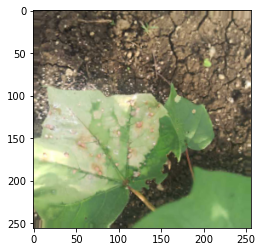

In [50]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


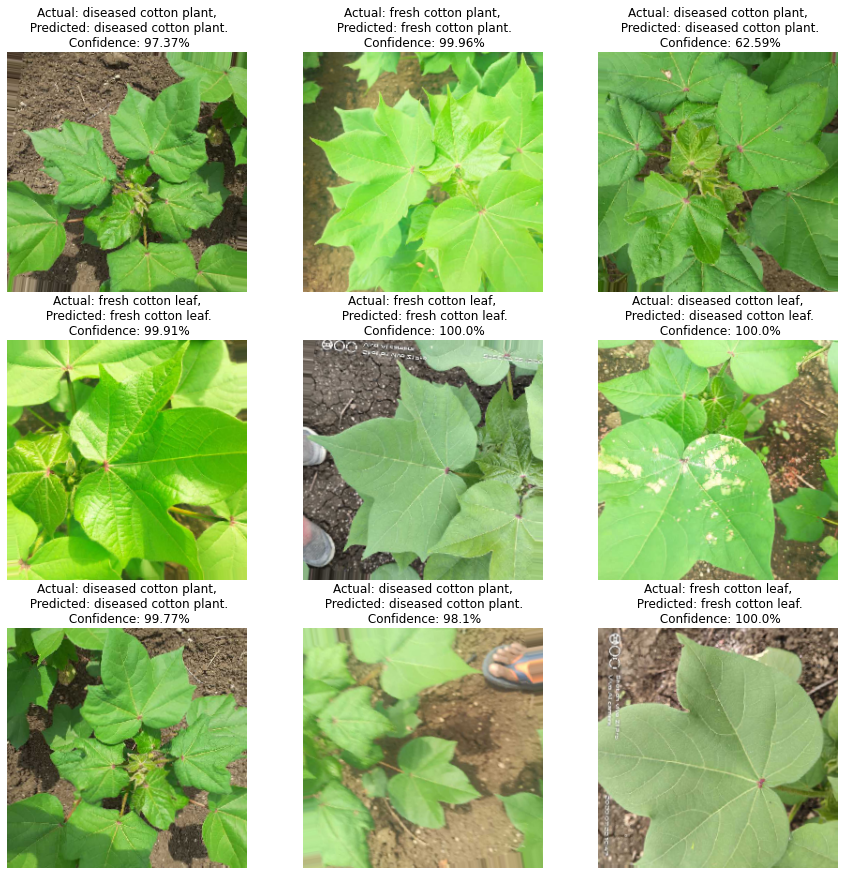

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [53]:
model.save("../CottonModel.h5")